## Analisi delle simulazioni

In [1]:
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt
from analisirisultati import *

Tempo totale: 1817
Dimensioni della griglia: 200 Lx 100 Ly
Densità totale particelle 5.0


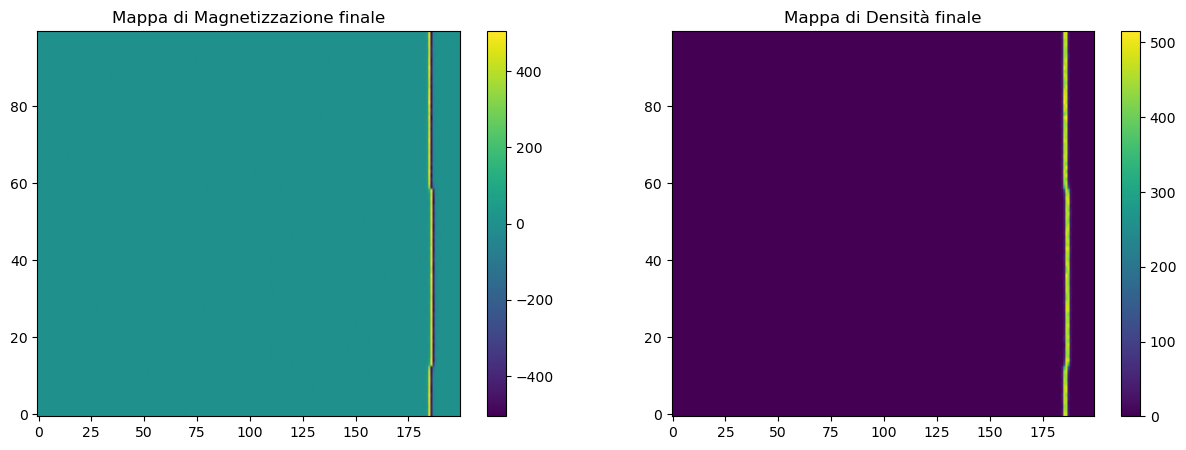

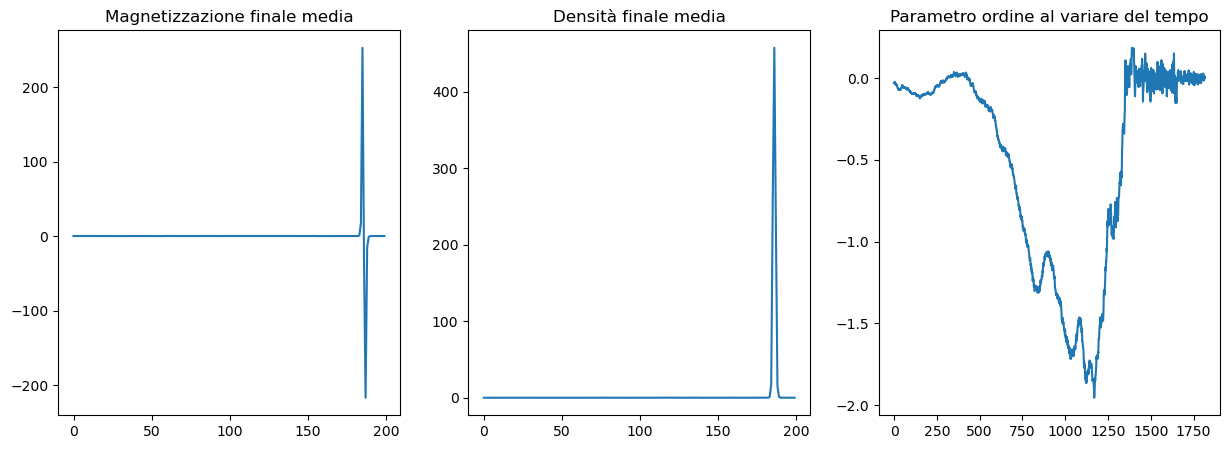

0.00138


In [5]:
from scipy.io import loadmat # type: ignore

percorso = '/Users/annat/Dati/graphsT0.200num01frames_m.mat'
percorso2 = '/Users/annat/Dati/graphsT0.200num01frames_d.mat'

dati = loadmat(percorso)
dati2 = loadmat(percorso2)

T = 0.2
D = 1
gamma = 0.02
metodo_calcolo = 1
frames = 5_000
t_tot = 3_500_000

magnet = dati['frames_m']
magnet = np.array(magnet, dtype=np.float64)

density = dati2['frames_d']
density = np.array(density, dtype=np.float64)

magnet_finale = magnet[-1, :, :]
magnet_finale =  np.squeeze(magnet_finale)

density_finale = density[-1, :, :]
density_finale =  np.squeeze(density_finale)

tempo = np.shape(magnet)[0]
Lx = np.shape(magnet)[2]
Ly = np.shape(magnet)[1]
densità_particelle = np.sum(density_finale)/(Lx*Ly)
print('Tempo totale:', tempo)
print('Dimensioni della griglia:', Lx, 'Lx', Ly, 'Ly')
print('Densità totale particelle', densità_particelle)


plot_finali(magnet, density, tempo, Lx, Ly)
media_finale = np.mean(magnet_finale)/densità_particelle
print(media_finale)

Soglia magnetizzazione (solo t=0): 11.900616613016025
Soglia magnetizzazione (media prime 50): 17.49938809971733
Soglia densità (solo t=0): 16.131149985513627
Soglia densità (media prime 50): 14.444671248910678


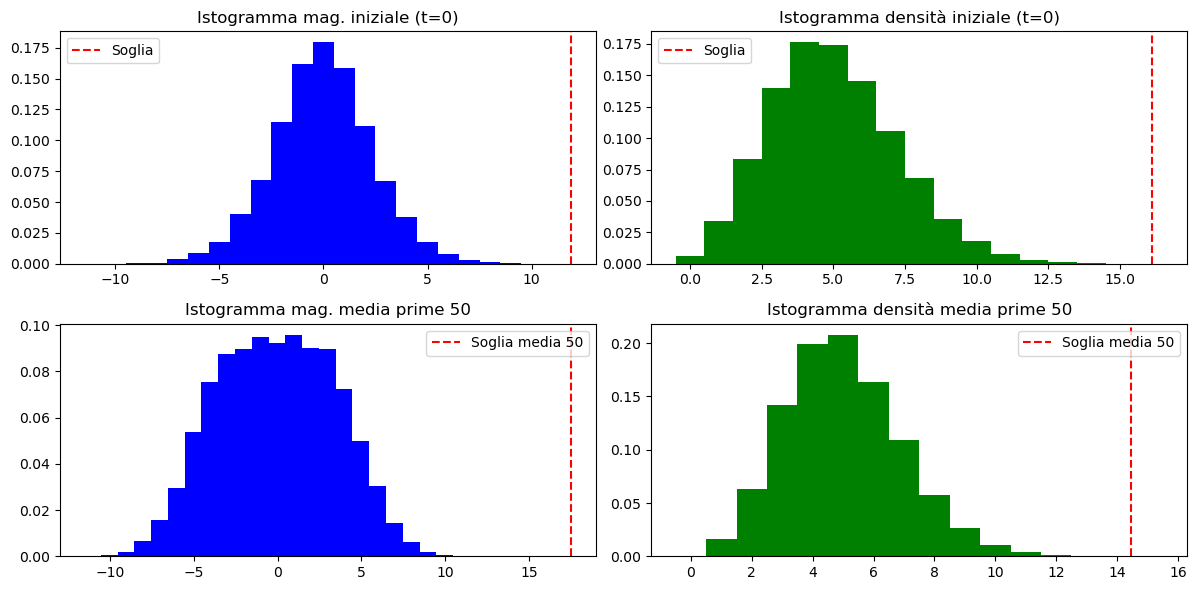

In [6]:
soglia = istogrammi_soglia(magnet, density, prime_immagini=50)

# Asters

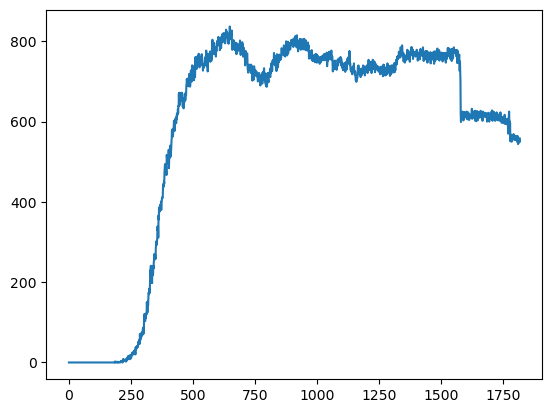

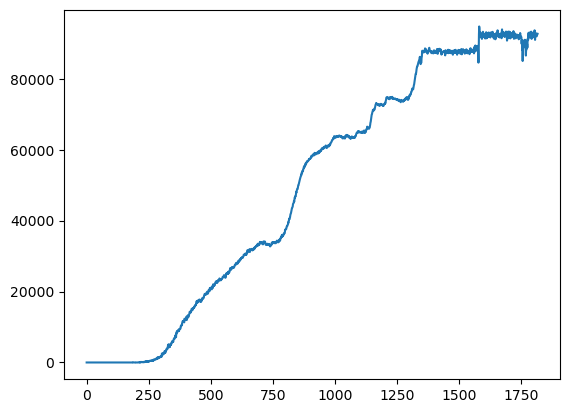

In [48]:
dentro = evoluzione_dentro(magnet, soglia, tempo)
inside = evoluzione_number(magnet, density, soglia, tempo)/(Lx*Ly*densità_particelle)
#np.save('inside04.npy', inside)
#np.save('dentro04.npy', dentro)

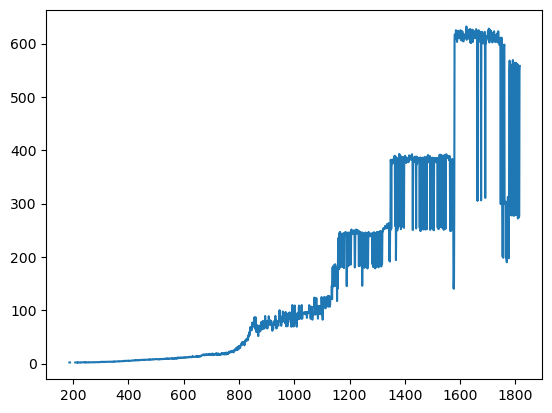

In [ ]:
aree = evoluzione_area(magnet, soglia)
plt.plot(np.arange(tempo), aree)
#np.save('aree11.npy', aree)

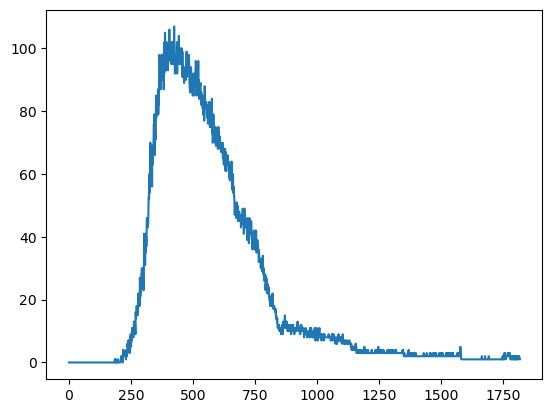

In [ ]:
num, _, _ = asters_over_time(magnet, soglia)
plt.plot(np.arange(tempo), num)
#np.save('num11', num)

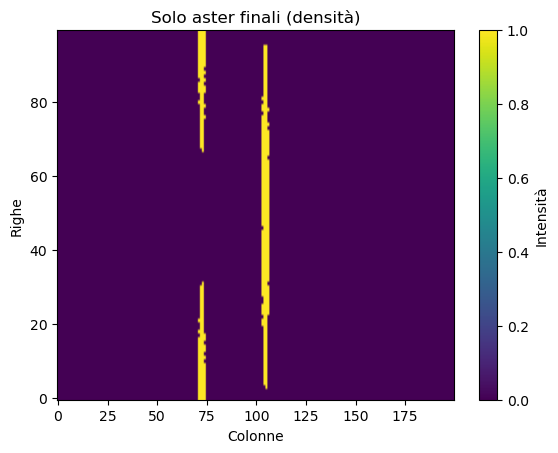

In [37]:
asters = heatmap_aster(density_finale, soglia)

plt.imshow(asters, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.title('Solo aster finali (densità)')
plt.xlabel('Colonne')
plt.ylabel('Righe')
plt.show()

(100, 200)
Numero di cluster: 2


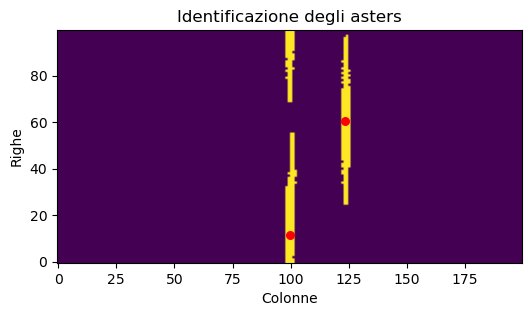

In [6]:
asters = heatmap_aster(np.squeeze(magnet[-1,:,:]), soglia)

print(asters.shape)

caratteristiche_cluster = caratterizzazione_aster(magnet_finale, soglia)
areas = caratteristiche_cluster[0]
centroids = caratteristiche_cluster[1]
num = areas.__len__()
print('Numero di cluster:', num)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(asters, cmap='viridis', origin='lower')
ax.set_title("Identificazione degli asters")
ax.set_xlabel("Colonne")
ax.set_ylabel("Righe")

# Disegno ogni centroide e un segmento che indica l'orientazione
for (cy, cx) in centroids:
    ax.scatter(cx, cy, c='red', s=30)

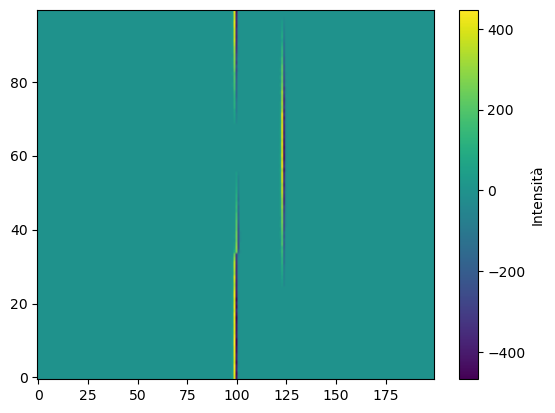

In [7]:
aster_finali_m = magnet_finale * asters
aster_finali_d = density_finale * asters

plt.imshow(aster_finali_m, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.show()

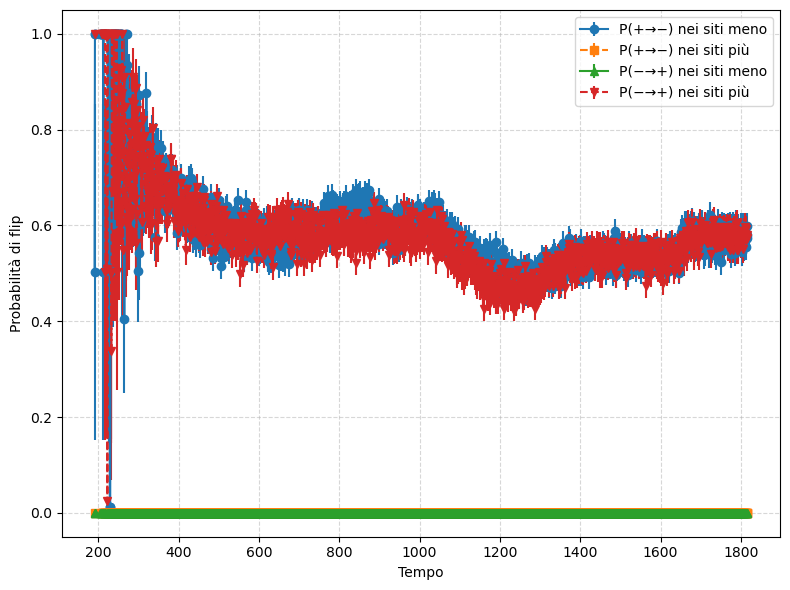

In [ ]:
mean_meno, std_meno, mean_piu, std_piu = time_series_probabilities(magnet, density, soglia, gamma, D, metodo_calcolo)
tempi = np.arange(tempo)

plot_time_series_probs(mean_meno, std_meno, mean_piu, std_piu, tempi)

In [8]:
#evoluzione_esterna(magnet, soglia)

In [9]:
rate = print_probabilities(magnet_finale, density_finale, soglia, T, gamma, D, metodo_calcolo)

Probabilità(+ --> -) in siti con magnetizzazione negativa: 86.44% +/- 0.66%
Probabilità(+ --> -) in siti con magnetizzazione positiva: 0.0051% +/- 0.000051%
Probabilità(- --> +) in siti con magnetizzazione negativa: 0.0051% +/- 0.000044%
Probabilità(- --> +) in siti con magnetizzazione positiva: 85.76% +/- 0.70%


In [10]:
x_dentro, std1, x_fuori, std2 = approssimazioni(magnet_finale, density_finale, soglia, T)

beta*m/d (dentro): 4.8681 +/- 0.006042
beta*m/d (fuori): 4.9063 +/- 0.008758


In [11]:
massimo_m, i_max = massimo_magnet(magnet)
print('Massimo valore di magnetizzazione:', massimo_m)
print('Indice del frame con il massimo valore di magnetizzazione:', i_max)

Massimo valore di magnetizzazione: 527.0
Indice del frame con il massimo valore di magnetizzazione: 1588


In [12]:
tc = tempo_colonna_piena(magnet, soglia, t0= 200)
tr = tempo_righe_non_vuote(magnet, soglia, t0= 200)

print('Frame formazione aster (colonne):', tc)
print('Frame formazione aster (righe):', tr)

print('Tempo totale simulazione:', np.size(build_log_indices(t_tot, frames)))

Frame formazione aster (colonne): 1817
Frame formazione aster (righe): 1817
Tempo totale simulazione: 3554


In [13]:
if tr == np.size(build_log_indices(t_tot, frames)):
    print('No formazione aster lungo tutto il sistema')
else:
    tempocf = tempo_fisico(tc-1,t_tot,frames, T, D)
    temporf = tempo_fisico(tr-1,t_tot,frames, T, D)
    print('Tempo fisico formazione aster:', tempocf)
    print('Tempo fisico formazione aster:', temporf)

Tempo fisico formazione aster: 280.4875920932033
Tempo fisico formazione aster: 280.4875920932033
